In [4]:
# Import libraries to aid your analysis
import pandas as pd #pandas places ones data in tables format
from bokeh.plotting import figure, output_notebook, show #builds interactive graphs for python
from bokeh.models import Range1d
import math #this is used in graphic section to use the irrational number pi
output_notebook() #Allows inline plotting for Juptyer notebook

#Import other librarires as recommended by http://dmnfarrell.github.io/bioinformatics/bokeh-maps
import geopandas as gpd
import json
import matplotlib as mpl
import pylab as plt

from bokeh.io import output_file, show, output_notebook, export_png
from bokeh.models import ColumnDataSource, GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.plotting import figure
from bokeh.palettes import brewer

import panel as pn
import panel.widgets as pnw

Loading BokehJS ...

In [16]:
conda install -c pyviz/label/dev param panel

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - panel
    - param


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    markdown-3.1.1             |           py37_0         117 KB
    panel-0.8.3                |             py_0         898 KB  pyviz/label/dev
    param-1.10.0a3             |             py_0          77 KB  pyviz/label/dev
    pyct-0.4.7a3               |             py_0           3 KB  pyviz/label/dev
    pyct-core-0.4.7a3          |             py_0          15 KB  pyviz/label/dev
    pyviz_comms-0.7.6          |             py_0          11 KB  pyviz/label/dev
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  markdown           pkgs/main/osx-64::markdown-3.1.1-py37_0
  pa

In [34]:
# Datasheet was downbloaed form GTD and being read in form a local .csv file
GTD = pd.read_csv("/Users/samanthagolden/Desktop/July Makeover Competition/JulyMakeoverMondayData.csv", encoding = "ISO-8859-1", engine = 'python') 
GTD.head() # see the structure--default is first five rows

Incident ID        Date Governorate        District  \
0            1  26/03/2015     Capital  Bani Al-Harith   
1            2  26/03/2015     Capital  Bani Al-Harith   
2            3  26/03/2015     Capital  Bani Al-Harith   
3            4  26/03/2015     Capital      Al-Sab'ein   
4            5  26/03/2015     Capital      Al-Thawrah   

                       Area                        Target  \
0                Al-Rahabah            Al-Daylami Airbase   
1                   Airport  Sana'a International Airport   
2  Al-Sonblah Neighbourhood              Residential Area   
3                Al-Nahdain           Presidential Palace   
4                Al-Nahdhah  Former 1st Armoured Division   

              Main category      Sub-category  Min Air Raids Max Air Raids  \
0  Military_Security_Target     Military Site              1             2   
1            Infrastructure         Transport              1             2   
2                  Civilian  Residential Area              1             2   
3  Military_Security_Target     Military Site              1             2   
4  Military_Security_Target     Military Site              1             2   

   Civilian Casualties  Fatalities   Woman fatalities  Child fatalities  \
0                    0            0                 0                 0   
1                    0            0                 0                 0   
2                   29           21                 3                14   
3                    0            0                 0                 0   
4                    0            0                 0                 0   

   Injured   Woman injured  Child injured  Confirmed Time    Time of Day  
0         0              0              0               2  Early-Morning  
1         0              0              0               2  Early-Morning  
2         8              0              7               2  Early-Morning  
3         0              0              0               3  Early-Morning  
4         0              0              0               3  Early-Morning

In [14]:
pip install geopandas

     |████████████████████████████████| 962 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 13.9 MB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 17.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Pandas library has a describe function to apply algorithms against the data...
# whether approriate or not
GTD.describe()

Incident ID  Min Air Raids  Civilian Casualties   Fatalities   \
count  21147.000000        21147.0         21147.000000  21147.000000   
mean   10574.000000            1.0             0.871755      0.410460   
std     6104.757407            0.0             9.331065      3.091645   
min        1.000000            1.0             0.000000      0.000000   
25%     5287.500000            1.0             0.000000      0.000000   
50%    10574.000000            1.0             0.000000      0.000000   
75%    15860.500000            1.0             0.000000      0.000000   
max    21147.000000            1.0           832.000000    156.000000   

       Woman fatalities  Child fatalities      Injured   Woman injured  \
count      21147.000000      21147.000000  21147.000000   21147.000000   
mean           0.038776          0.064690      0.461295       0.027380   
std            0.449376          0.783457      7.246929       0.422861   
min            0.000000          0.000000      0.000000       0.000000   
25%            0.000000          0.000000      0.000000       0.000000   
50%            0.000000          0.000000      0.000000       0.000000   
75%            0.000000          0.000000      0.000000       0.000000   
max           32.000000         40.000000    695.000000      24.000000   

       Child injured  
count   21147.000000  
mean        0.043221  
std         0.770093  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        56.000000

In [7]:
#Identifies the total number of rows
len(GTD)

21147

In [8]:
#provides information about the dataframe
GTD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21147 entries, 0 to 21146
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Incident ID          21147 non-null  int64 
 1   Date                 21147 non-null  object
 2   Governorate          21147 non-null  object
 3   District             20910 non-null  object
 4   Area                 18634 non-null  object
 5   Target               21147 non-null  object
 6   Main category        21147 non-null  object
 7   Sub-category         21147 non-null  object
 8   Min Air Raids        21147 non-null  int64 
 9   Max Air Raids        21146 non-null  object
 10  Civilian Casualties  21147 non-null  int64 
 11  Fatalities           21147 non-null  int64 
 12  Woman fatalities     21147 non-null  int64 
 13  Child fatalities     21147 non-null  int64 
 14  Injured              21147 non-null  int64 
 15  Woman injured        21147 non-null  int64 
 16  Chil

In [9]:
#See the titles of the 135 columns
for col in GTD.columns:
    print(col)

Incident ID
Date
Governorate
District
Area
Target
Main category
Sub-category
Min Air Raids
Max Air Raids
Civilian Casualties
Fatalities 
Woman fatalities
Child fatalities
Injured 
Woman injured
Child injured
 Confirmed Time
Time of Day


In [19]:
#Imports necessary aspects of Bokeh for plotting on a map
from bokeh.tile_providers import get_provider, Vendors
from pyproj import Proj, transform
tile_provider = get_provider('STAMEN_TERRAIN')

In [6]:
#Read in gdb file for administrative boundaries
admb = gpd.read_file(r'/Users/samanthagolden/Desktop/July Makeover Competition/yem_adm_govyem_cso_ochayemen_20191002_GDB.gdb')

In [24]:
#Describe the contents of the geodatabase 'admb'
admb.head()
#admb.iloc[0]['geometry']
#type(admb)
#admb.plot()
#str(admb.iloc[0]['geometry'])

admin0Name_en admin0Name_ar admin0Pcode admin0RefName admin0AltName1_en  \
0         Yemen         اليمن          YE         Yemen                     

  admin0AltName2_en admin0AltName1_ar admin0AltName2_ar       date_  \
0                                                        2019-02-01   

      validOn validTo                                           geometry  
0  2019-10-02          MULTIPOLYGON (((53.31113 12.11174, 53.30725 12...

In [20]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [26]:
govbound = gpd.read_file(r'/Users/samanthagolden/Desktop/July Makeover Competition/yem_adm_govyem_cso_ochayemen_20191002_shp/yem_admbnda_adm1_govyem_cso_20191002.shp')

In [27]:
govbound.head()

ADM0_EN ADM0_AR ADM0_PCODE      ADM1_EN        ADM1_AR ADM1_PCODE  \
0   Yemen   اليمن         YE          Ibb             اب       YE11   
1   Yemen   اليمن         YE        Abyan           ابين       YE12   
2   Yemen   اليمن         YE  Sana'a City  امانة العاصمه       YE13   
3   Yemen   اليمن         YE     Al Bayda        البيضاء       YE14   
4   Yemen   اليمن         YE        Ta'iz            تعز       YE15   

   ADM1REF_EN ADM1ALT1AR ADM1ALT1EN ADM1ALT2AR ADM1ALT2EN       date_  \
0         Ibb       None       None       None       None  2019-02-01   
1       Abyan       None       None       None       None  2019-02-01   
2  Sanaa City       None       None       None       None  2019-02-01   
3    Al Bayda       None       None       None       None  2019-02-01   
4        Taiz       None       None       None       None  2019-02-01   

      validOn validTo                                           geometry  
0  2019-10-02    None  POLYGON ((44.08076 14.38973, 44.08362 14.37772...  
1  2019-10-02    None  POLYGON ((46.29563 14.26991, 46.29770 14.26687...  
2  2019-10-02    None  POLYGON ((44.33380 15.60702, 44.35087 15.59940...  
3  2019-10-02    None  MULTIPOLYGON (((44.72676 14.15240, 44.72637 14...  
4  2019-10-02    None  MULTIPOLYGON (((43.41111 12.67158, 43.41124 12...

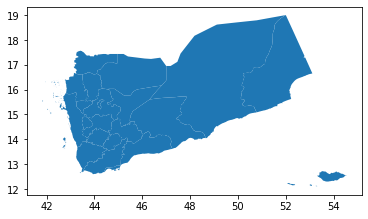

In [32]:
govbound.plot()

In [82]:
#Using CSV file, calculate total civilian casualties by governorate. Create new dataframe.
grouped_GTD = GTD.groupby(["Governorate"])[["Civilian Casualties"]]
newGTD = pd.DataFrame(grouped_GTD.size().reset_index(name = "Group_Count"))
newGTD.head()

Governorate  Group_Count
0       Abyan           85
1        Aden          293
2       Amran          420
3       Bayda          477
4     Capital         1383

In [44]:
#Going back to .shp file, 'govbound', rename ADM1_EN as Governorate to enable data merge
govbound_new = govbound.rename(columns={"ADM1_EN": "Governorate"})

In [58]:
#replace cell value names to match CSV
govbound_new.at[2, "Governorate"] = "Capital"
govbound_new.at[3, "Governorate"] = "Bayda"
govbound_new.at[4, "Governorate"]= "Taiz"
govbound_new.at[5, "Governorate"]= "Jawf"
govbound_new.at[7, "Governorate"]= "Hudaydah"
govbound_new.at[10, "Governorate"]= "Shabwa"
govbound_new.at[11, "Governorate"]= "Saada"
govbound_new.at[12, "Governorate"]= "Sanaa"
govbound_new.at[15, "Governorate"]= "Marib"
govbound_new.at[16, "Governorate"]= "Mahwit"
govbound_new.at[17, "Governorate"]= "Maharah"
govbound_new.at[19, "Governorate"]= "Dhalie"
govbound_new.at[5, "Governorate"]= "Jawf"

In [59]:
govbound_new.head()

ADM0_EN ADM0_AR ADM0_PCODE Governorate        ADM1_AR ADM1_PCODE  \
0   Yemen   اليمن         YE         Ibb             اب       YE11   
1   Yemen   اليمن         YE       Abyan           ابين       YE12   
2   Yemen   اليمن         YE     Capital  امانة العاصمه       YE13   
3   Yemen   اليمن         YE       Bayda        البيضاء       YE14   
4   Yemen   اليمن         YE        Taiz            تعز       YE15   

   ADM1REF_EN ADM1ALT1AR ADM1ALT1EN ADM1ALT2AR ADM1ALT2EN       date_  \
0         Ibb       None       None       None       None  2019-02-01   
1       Abyan       None       None       None       None  2019-02-01   
2  Sanaa City       None       None       None       None  2019-02-01   
3    Al Bayda       None       None       None       None  2019-02-01   
4        Taiz       None       None       None       None  2019-02-01   

      validOn validTo                                           geometry  
0  2019-10-02    None  POLYGON ((44.08076 14.38973, 44.08362 14.37772...  
1  2019-10-02    None  POLYGON ((46.29563 14.26991, 46.29770 14.26687...  
2  2019-10-02    None  POLYGON ((44.33380 15.60702, 44.35087 15.59940...  
3  2019-10-02    None  MULTIPOLYGON (((44.72676 14.15240, 44.72637 14...  
4  2019-10-02    None  MULTIPOLYGON (((43.41111 12.67158, 43.41124 12...

In [83]:
#Merge new dataframe, newGTD, and Shapefile
civmap = govbound_new.merge(newGTD, left_on = "Governorate", right_on = "Governorate")

#Drop Socotra from govbound_new file
civmap = civmap.loc[~civmap['Governorate'].isin(['Socotra'])]

In [84]:
#convert the data to a format that is conducive to mapping
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = civmap.to_json())

In [87]:
# Create figure object.
p = figure(title = 'Civilian Casualties by Yemeni Governorate, 2015-2020', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, box_zoom, reset") 
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
# Add patch renderer to figure.
Governorates = p.patches('xs','ys', source = geosource,
                   fill_color = None,
                   line_color = 'gray', 
                   line_width = 0.25, 
                   fill_alpha = 1)
# Create hover tool
p.add_tools(HoverTool(renderers = [Governorates],
                      tooltips = [('Governorate','@Governorate'),
                                ('Civilian Casualties','@Group_Count')]))
show(p)

In [96]:
# Define color palettes
palette = brewer['BuGn'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors
# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 3000)
# Define custom tick labels for color bar.
tick_labels = {'0': '0', '50': '50',
 '100':'100', '200':'200',
 '300':'300', '400':'400', '500':'500',
 '600':'600', '700':'700', '800': '800', '900': '900', 
 '1000':'1,000', '1100': '1,100', '1200': '1,200', '1300':'1,300',
 '1400': '1,400', '1500': '1,500', '1600': '1,600', '1700':'1,700',
 '1800':'1,800','1900':'1,900','2000':'2,000','2100':'2,100','2200':'2,200',
 '2300':'2,300','2400':'2,400','2500':'2,500','2600':'2,600','2700':'2,700',
 '2800':'2,800','2900':'2,900','3000':'3,000'}
# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',
                     major_label_overrides = tick_labels)
# Create figure object.
p = figure(title = 'Civilian Casualties by Yemeni Governorate, 2015-2020', 
           plot_height = 600, plot_width = 950, 
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, box_zoom, reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
# Add patch renderer to figure.
Governorates = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'Group_Count',
                                 'transform' : color_mapper},
                   line_color = "gray", 
                   line_width = 0.25, 
                   fill_alpha = 1)
# Create hover tool
p.add_tools(HoverTool(renderers = [Governorates],
                      tooltips = [('Governorate','@Governorate'),
                                ('Civilian Casualties','@Group_Count')]))
# Specify layout
# p.add_layout(color_bar, ‘below’)
show(p)